# The Sparks Foundation

### GRIP : Data Science and Business Analytics

### Author : James Mwangi

### Task 3 : Explanatory Data Analysis - Retail

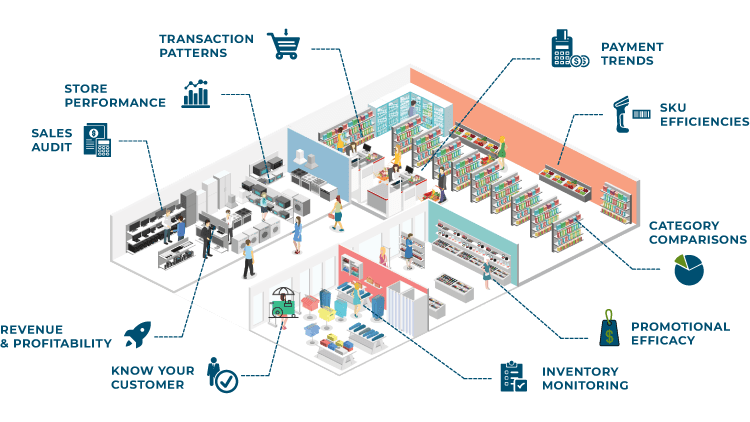

- **Project Name:** ProfitPulse:Unveiling Profits Through Data Insights
- **Objective:** Transform the retail landscape through comprehensive Exploratory Data Analysis (EDA).
- **Focus Areas:**
  - Product performance
  - Customer behavior
  - Pricing strategies
  - Geographic trends
- **Key Outcomes:**
  - 360-degree view of retail operations
  - Actionable insights for managers
  - Optimization of sales and inventory management
  - Enhanced customer satisfaction
  - Increased profitability
- **Approach:**
  - Conduct thorough EDA
  - Uncover hidden opportunities
  - Address critical challenges
- **Metaphor:** Data orchestrated like a symphony
- **Strategic Impact:** A dynamic approach to retail management that harmonizes data for a profitable and sustainable retail strategy.

# A  . Loading the Dataset.

In [1]:
#Importing the libaries and packages to use in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Importing the  Dataset

retail = pd.read_csv("/kaggle/input/retail-sample-superstore/SampleSuperstore.csv")

# B. Initial Data Exploration.

In [2]:
#Viewing the dataframe
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


 ## Step 1: Data Cleaning

- ### Check for missing values.

In [3]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

>- ### No missing Values.

 ## Step 2: Descriptive Statistics

- ### Observing the datafame summary statistics

In [4]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000



Key observations from the provided descriptive statistics:

- **Sales:** The mean sales amount is 229.86, with a minimum of 0.44 and a maximum of 22,638.48. The distribution appears to be positively skewed, given that the mean is higher than the median.

- **Quantity:** On average, around 3.79 items are sold per entry. The quantity ranges from a minimum of 1 to a maximum of 14.

- **Discount:** The mean discount is 0.16, with discounts ranging from 0% to 80%. It seems that most entries have a relatively low discount, as indicated by the 25th percentile (Q1) and median (Q2) values.

- **Profit:** The mean profit is 28.66, with profits ranging from a minimum of -6,599.98 to a maximum of 8,399.98. The distribution of profits seems to be right-skewed.

These descriptive statistics provide a summary of the central tendency, dispersion, and shape of the distribution for each numerical column in the dataframe, offering insights into the retail data's characteristics.

- ### Observing the dataframe categorical structure.

In [5]:
retail.describe(include = object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


The provided descriptive statistics for categorical columns in the "retail" dataframe offer insights into the distribution and characteristics of these categorical variables.

1. **Ship Mode:**
   - **Count:** There are 9994 entries in the dataset for the "Ship Mode" column.
   - **Unique:** There are 4 unique values, indicating four different shipping modes.
   - **Top:** The most frequent shipping mode is "Standard Class."
   - **Frequency:** "Standard Class" occurs 5968 times in the dataset.

2. **Segment:**
   - **Count:** There are 9994 entries in the dataset for the "Segment" column.
   - **Unique:** There are 3 unique values, representing three different customer segments.
   - **Top:** The most frequent customer segment is "Consumer."
   - **Frequency:** "Consumer" occurs 5191 times in the dataset.

3. **Country:**
   - **Count:** There are 9994 entries in the dataset for the "Country" column.
   - **Unique:** There is 1 unique value, indicating that all entries are from the United States.
   - **Top:** The only country present in the dataset is the "United States."
   - **Frequency:** "United States" occurs in all 9994 entries.

4. **City:**
   - **Count:** There are 9994 entries in the dataset for the "City" column.
   - **Unique:** There are 531 unique values, indicating 531 different cities.
   - **Top:** The most frequent city is "New York City."
   - **Frequency:** "New York City" occurs 915 times in the dataset.

5. **State:**
   - **Count:** There are 9994 entries in the dataset for the "State" column.
   - **Unique:** There are 49 unique values, representing 49 different states.
   - **Top:** The most frequent state is "California."
   - **Frequency:** "California" occurs 2001 times in the dataset.

6. **Region:**
   - **Count:** There are 9994 entries in the dataset for the "Region" column.
   - **Unique:** There are 4 unique values, indicating four different regions.
   - **Top:** The most frequent region is the "West."
   - **Frequency:** "West" occurs 3203 times in the dataset.

7. **Category:**
   - **Count:** There are 9994 entries in the dataset for the "Category" column.
   - **Unique:** There are 3 unique values, representing three different product categories.
   - **Top:** The most frequent category is "Office Supplies."
   - **Frequency:** "Office Supplies" occurs 6026 times in the dataset.

8. **Sub-Category:**
   - **Count:** There are 9994 entries in the dataset for the "Sub-Category" column.
   - **Unique:** There are 17 unique values, representing 17 different sub-categories.
   - **Top:** The most frequent sub-category is "Binders."
   - **Frequency:** "Binders" occurs 1523 times in the dataset.

These descriptive statistics provide a summary of the distribution of categorical variables in the "retail" dataframe, offering insights into the most common values and their frequencies.

- ### Identifying Outliers.

In [6]:
from scipy import stats

# Specify the numeric columns for outlier detection
numeric_cols = retail.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numeric column
z_scores = stats.zscore(retail[numeric_cols])

# Define a threshold for considering values as outliers (e.g., Z-score greater than 3)
outliers = (z_scores > 3) | (z_scores < -3)

# Print the count of outliers for each numeric column
print("\nOutliers Count:\n", outliers.sum())

# Display the rows with outliers
outlier_rows = retail[outliers.any(axis=1)]
print("\nRows with Outliers:\n")
outlier_rows


Outliers Count:
 Postal Code      0
Sales          127
Quantity       113
Discount       300
Profit         107
dtype: int64

Rows with Outliers:



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
75,First Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1.248,3,0.8,-1.9344
101,Standard Class,Home Office,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,1.788,3,0.8,-3.0396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.386,7,0.8,-35.8176
9929,Same Day,Consumer,United States,San Francisco,California,94122,West,Technology,Copiers,2799.960,5,0.2,944.9865
9941,Standard Class,Consumer,United States,San Francisco,California,94122,West,Technology,Accessories,223.580,14,0.0,87.1962
9948,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Office Supplies,Appliances,2405.200,8,0.0,793.7160


- ###  Handling outliers.
  - Here, we use the median for 'Sales' and 'Profit' and the mean for 'Quantity' and 'Discount' to impute outliers in the retail dataset. 
  - This approach is chosen to ensure a more robust estimation of central tendency while handling extreme values in 'Sales' and 'Profit' and maintaining the overall distribution for 'Quantity' and 'Discount'.

In [7]:
import numpy as np

# Impute outliers with median for 'Sales' and 'Profit', mean for 'Quantity' and 'Discount'
sales_median = retail['Sales'].median()
profit_median = retail['Profit'].median()
quantity_mean = retail['Quantity'].mean()
discount_mean = retail['Discount'].mean()

retail['Sales'] = np.where(outliers['Sales'], sales_median, retail['Sales'])
retail['Profit'] = np.where(outliers['Profit'], profit_median, retail['Profit'])
retail['Quantity'] = np.where(outliers['Quantity'], quantity_mean, retail['Quantity'])
retail['Discount'] = np.where(outliers['Discount'], discount_mean, retail['Discount'])

# Display the rows with outliers after imputation
outlier_rows_after_imputation = retail[outliers.any(axis=1)]
print("\nRows with Outliers after Imputation:\n")
outlier_rows_after_imputation


Rows with Outliers after Imputation:



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5.000000,0.156203,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3.000000,0.156203,-3.8160
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,54.490,7.000000,0.500000,8.6665
75,First Class,Corporate,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1.248,3.000000,0.156203,-1.9344
101,Standard Class,Home Office,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,1.788,3.000000,0.156203,-3.0396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.386,7.000000,0.156203,-35.8176
9929,Same Day,Consumer,United States,San Francisco,California,94122,West,Technology,Copiers,54.490,5.000000,0.200000,8.6665
9941,Standard Class,Consumer,United States,San Francisco,California,94122,West,Technology,Accessories,223.580,3.789574,0.000000,87.1962
9948,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Office Supplies,Appliances,54.490,8.000000,0.000000,8.6665


# 3. Data Visualization.


### 1. Pair Plot for Numerical Features:

   - Explore relationships between pairs of numerical features.

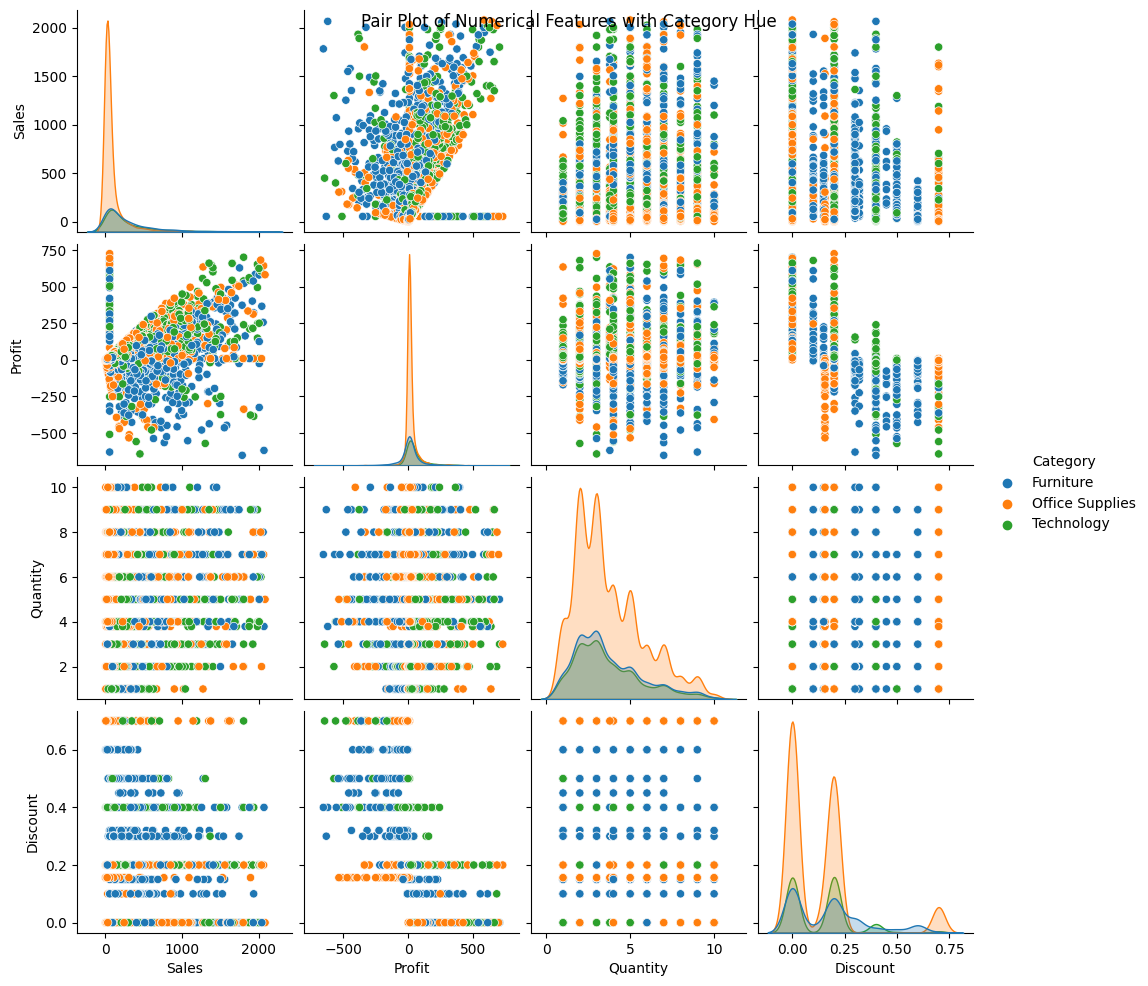

In [8]:

sns.pairplot(retail[['Sales', 'Profit', 'Quantity', 'Discount', 'Category']], hue='Category')
plt.suptitle('Pair Plot of Numerical Features with Category Hue')
plt.show()


- *This plot helps us understand the relationships between numerical features.*


Here are some additional observations from the pair plot:

- **Sales is positively correlated with quantity and discount.** This means that products that are sold in higher quantities and at a discount tend to generate more sales.
- **Profit is positively correlated with sales and discount.** This means that products that generate more sales and are sold at a discount tend to be more profitable.
- **Category has a strong influence on all of the numerical features.** For example, products in the Furniture category tend to have higher sales, profits, and discounts than products in the Office Supplies category.

### 2.Heatmap of Correlation Matrix:

- Visualize the correlation between numerical features.

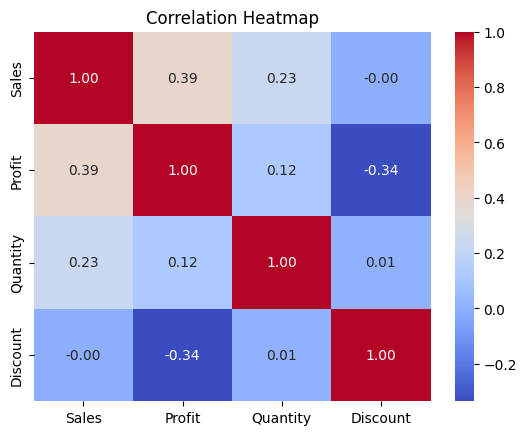

In [9]:
correlation_matrix = retail[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


- *Identify the strength and direction of correlations between numerical features.*

### 3. Box Plot for Profit by Region:

- Explore profit distribution across different regions.

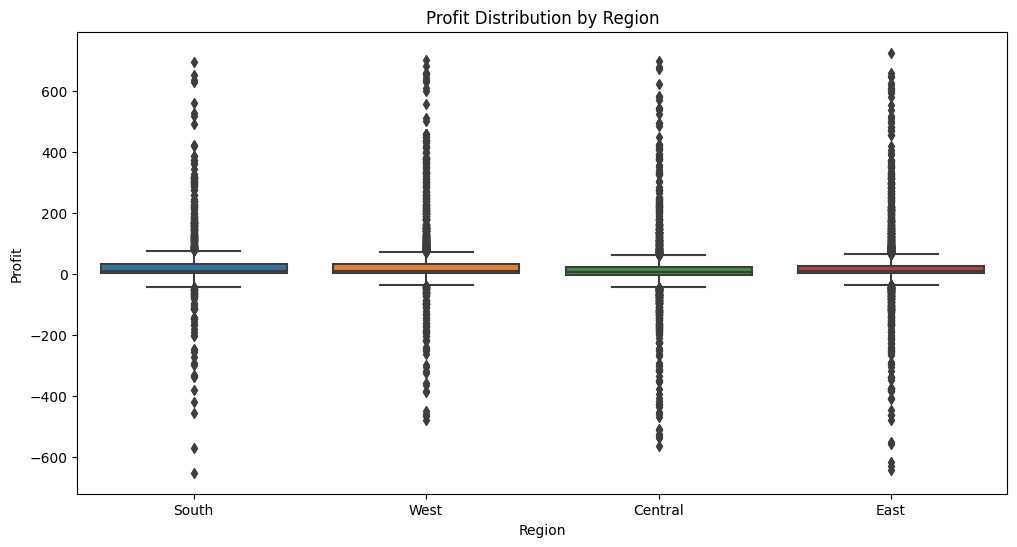

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Profit', data=retail)
plt.title('Profit Distribution by Region')
plt.show()


- *Explore how profit varies across different regions.*

### 4. Count Plot for Categories:

- Display the count of products in each category.

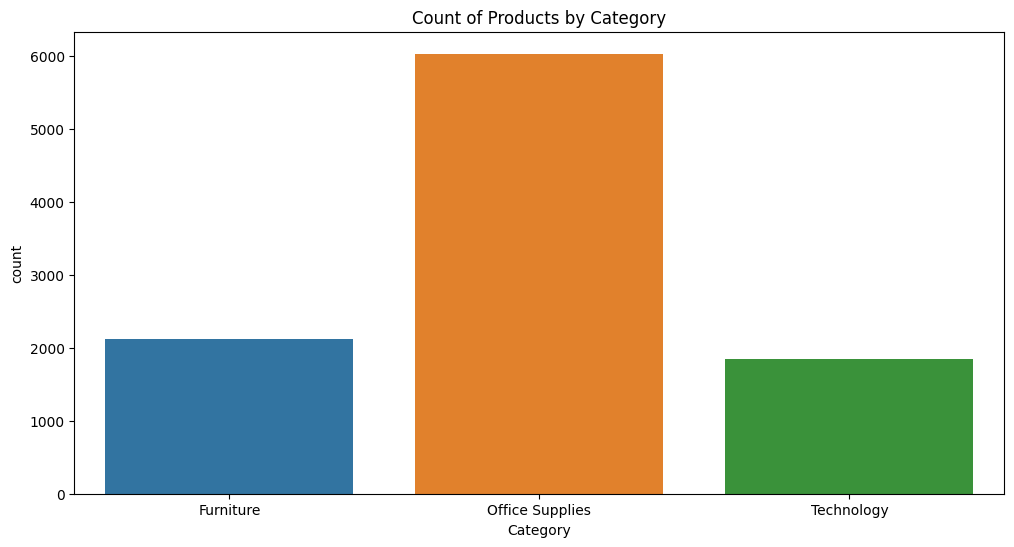

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=retail)
plt.title('Count of Products by Category')
plt.show()


- *Understand the distribution of products across categories.*

### 5. Bar Plot for Sales by Sub-Category:

- Visualize sales for each sub-category.

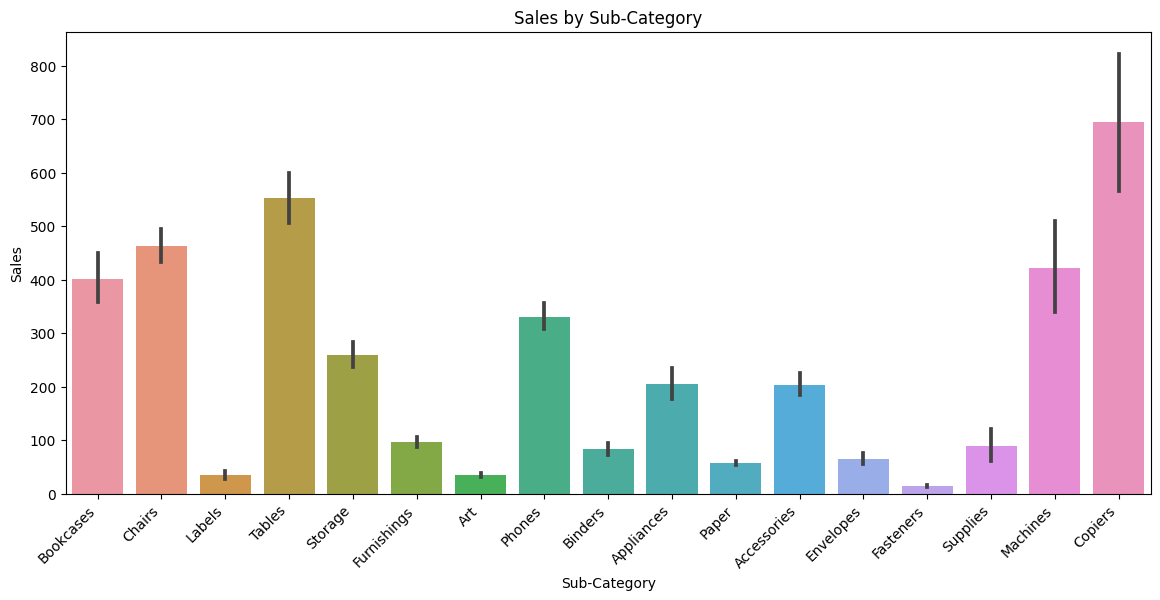

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Sub-Category', y='Sales', data=retail)
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.show()


- *Identify which sub-categories contribute most to sales.*

### 6.  Pie Chart for Sales Distribution by Segment:

- Display the distribution of sales across different segments.

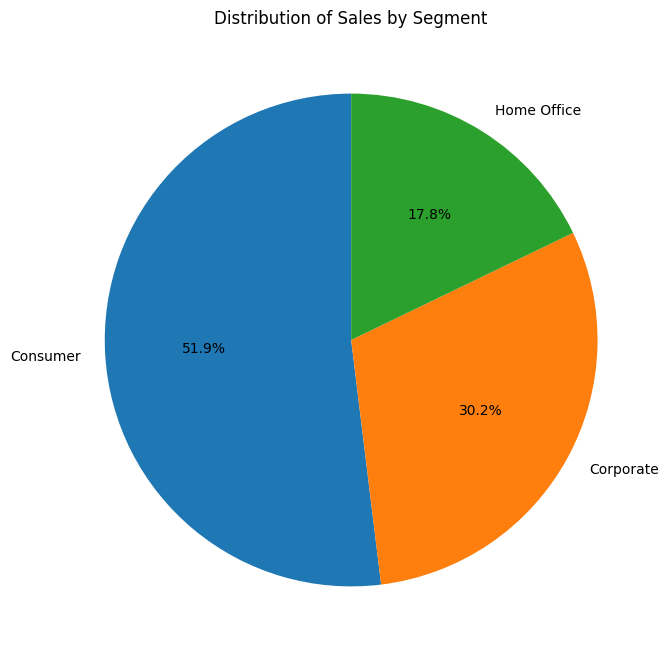

In [13]:
segment_distribution = retail['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales by Segment')
plt.show()


- *Understand the proportion of sales across different customer segments.*

### 7. Histogram for Discount Distribution:

- Visualize the distribution of discounts.

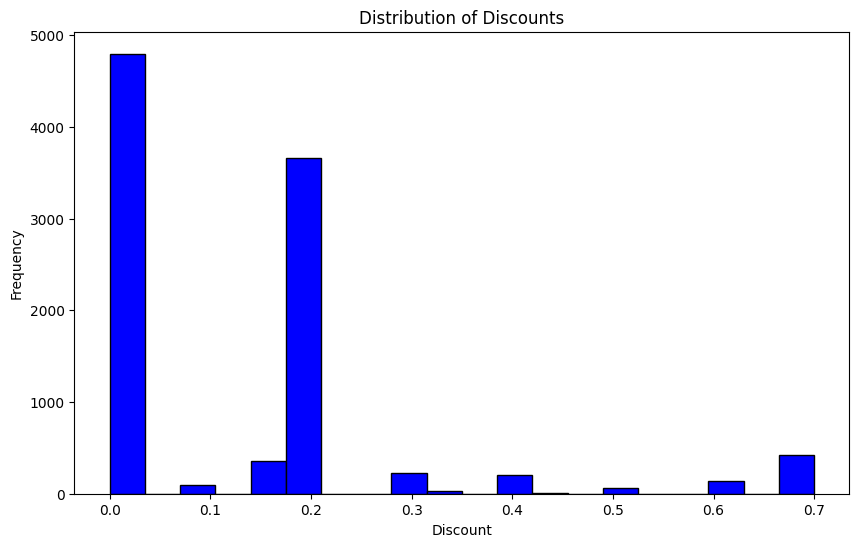

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(retail['Discount'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


- *Understand the distribution of discount values.*

### 8. Scatter Plot for Sales vs. Quantity:

- Explore the relationship between sales and quantity.

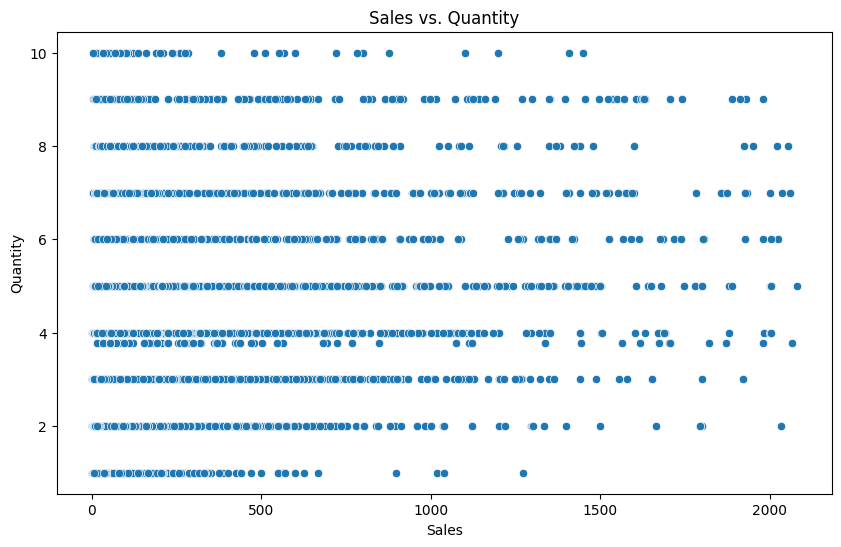

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Quantity', data=retail)
plt.title('Sales vs. Quantity')
plt.show()


- *Explore the relationship between sales and quantity.*

### 9. Violin Plot for Profit by Category and Segment:

- Visualize the distribution of profits for each category and segment.

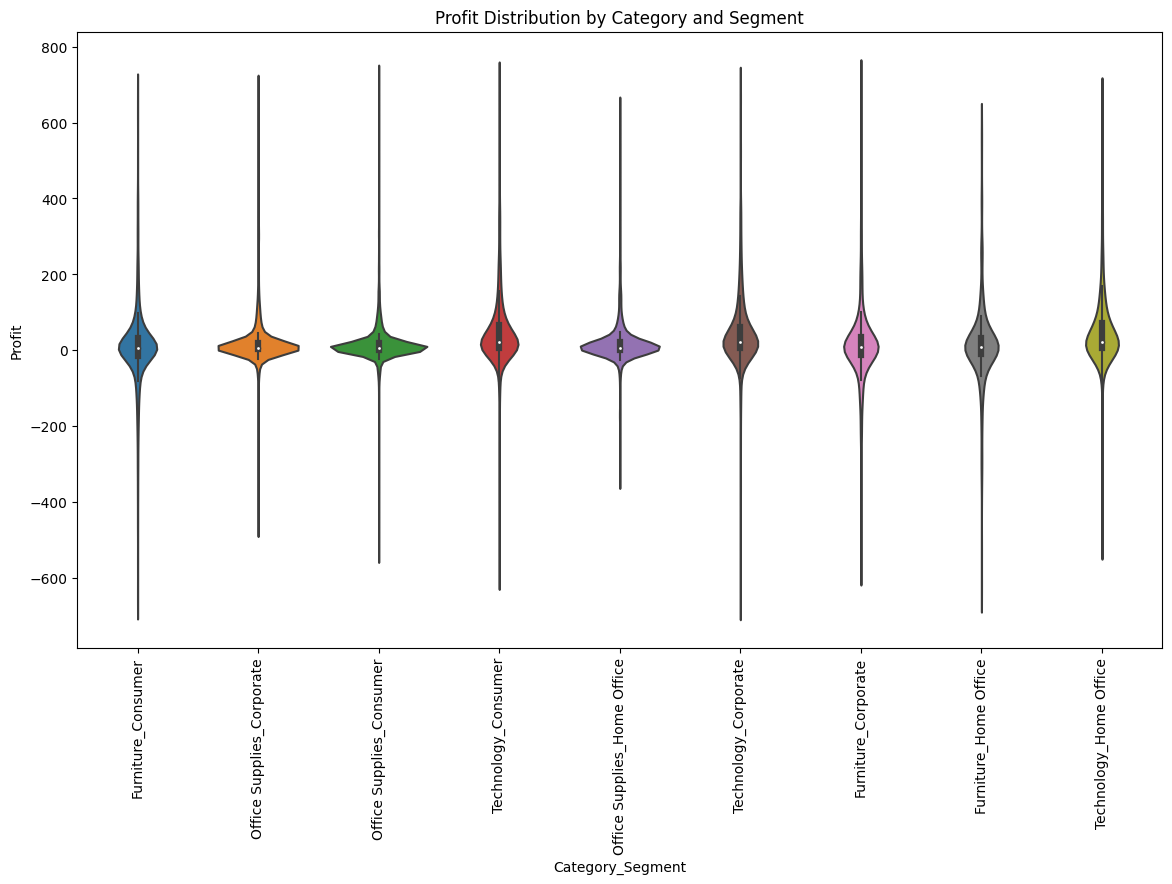

In [16]:
# Combine 'Category' and 'Segment' into a new variable
retail['Category_Segment'] = retail['Category'] + '_' + retail['Segment']

plt.figure(figsize=(14, 8))
sns.violinplot(x='Category_Segment', y='Profit', data=retail, split=True)
plt.title('Profit Distribution by Category and Segment')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

- *Visualize the distribution of profits across categories and segments.*

### 10. Bar Plot for Average Discount by Region:

- Compare the average discount across different regions.

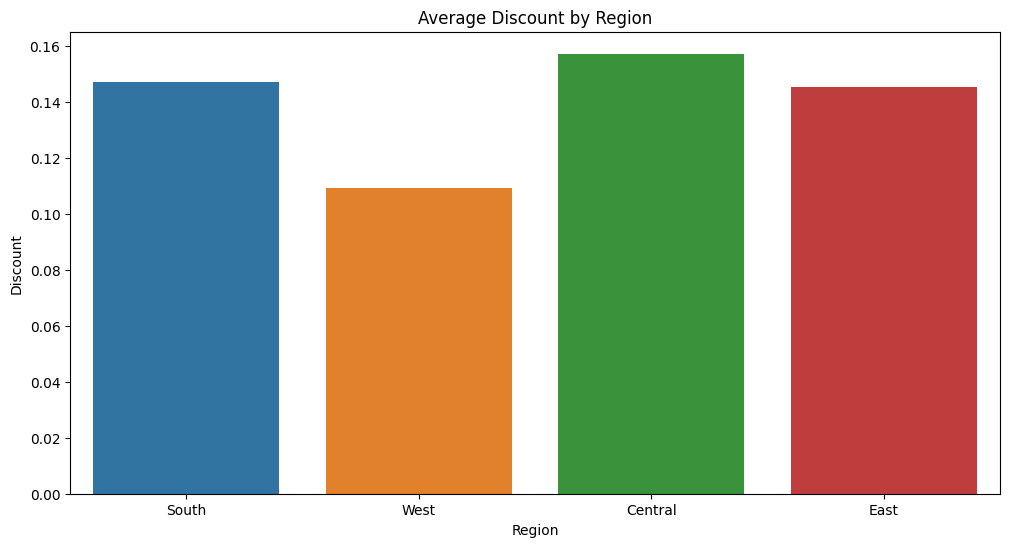

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Discount', data=retail,errorbar=None)
plt.title('Average Discount by Region')
plt.show()


- *Compare the average discount across different regions.* 

### 11. Box Plot for Sales by Region and Category:

- Explore the distribution of sales for each region and category.

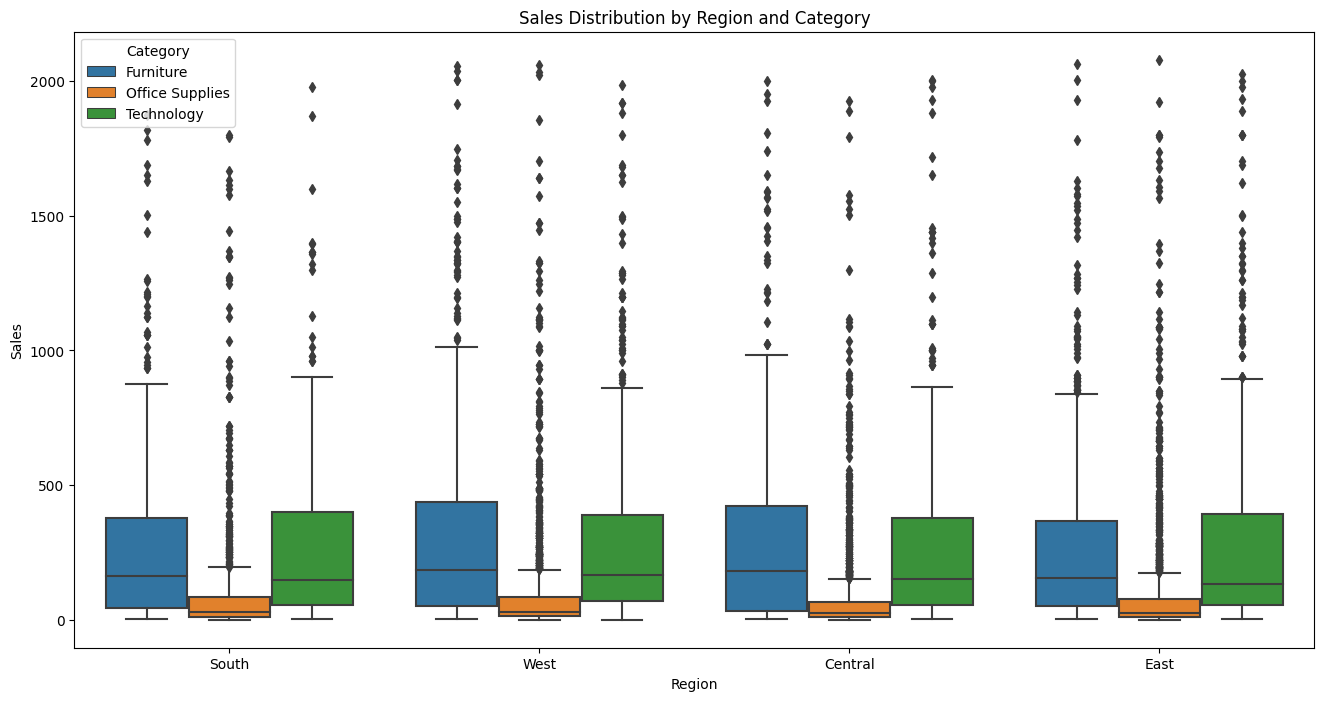

In [18]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Region', y='Sales', hue='Category', data=retail)
plt.title('Sales Distribution by Region and Category')
plt.show()


- *Explore the distribution of sales for each region and category.*

### 12. Pie Chart for Sales Distribution by Ship Mode:

- Display the distribution of sales across different ship modes.

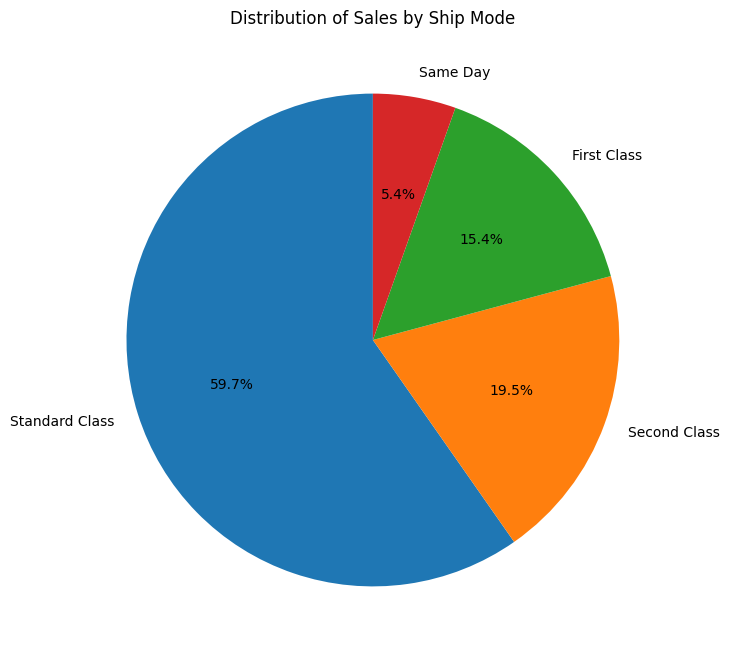

In [19]:
ship_mode_distribution = retail['Ship Mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ship_mode_distribution, labels=ship_mode_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sales by Ship Mode')
plt.show()


- *Understand the distribution of sales across different ship modes.*

### 13. Network Graph of Products:

- Creating a network graph to visualize relationships between products and sub-categories.

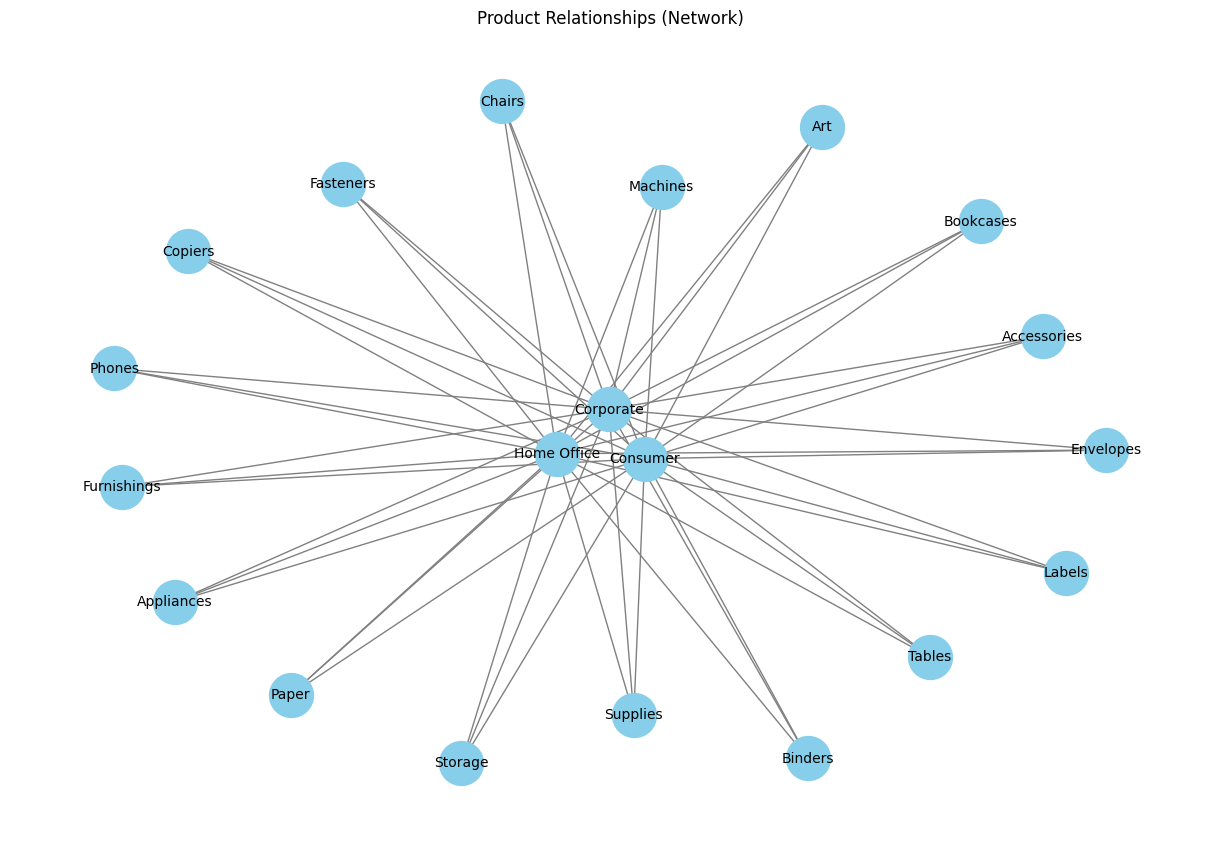

In [20]:
import networkx as nx

G = nx.from_pandas_edgelist(retail, source='Segment', target='Sub-Category')
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
plt.title('Product Relationships (Network)')
plt.show()


- *Visualize relationships between sub-categories and products using a network graph.*

# 4. Product Analysis:

### 1. Best-Selling and Least-Selling Products:

In [21]:
# Best-selling products
best_selling_products = retail.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Best-Selling Products:")
best_selling_products


Best-Selling Products:


Sub-Category
Binders        5781.370622
Paper          5056.054032
Furnishings    3461.474885
Phones         3200.895737
Storage        3083.106164
Name: Quantity, dtype: float64

In [22]:

# Least-selling products
least_selling_products = retail.groupby('Sub-Category')['Quantity'].sum().sort_values().head(5)
print("\nLeast-Selling Products:")
least_selling_products



Least-Selling Products:


Sub-Category
Copiers      234.000000
Machines     425.579147
Supplies     647.000000
Bookcases    850.579147
Fasteners    861.737442
Name: Quantity, dtype: float64

### 2. Profitability Analysis of Each Product:

In [23]:
# Profitability analysis
profitability_analysis = retail.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("\nProfitability Analysis:")
profitability_analysis



Profitability Analysis:


Sub-Category
Phones         40903.8663
Accessories    38894.4778
Paper          34053.5693
Chairs         25090.7395
Storage        20495.2238
Appliances     17848.1226
Binders        17503.5821
Furnishings    13059.1436
Copiers        13057.3776
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        2671.5913
Fasteners        949.5182
Supplies         663.5885
Bookcases      -2007.8873
Tables        -12299.1597
Name: Profit, dtype: float64

### 3. Patterns or Trends Related to Product Categories:

In [24]:
# Patterns or trends related to product categories
category_trends = retail.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()
category_trends = category_trends.sort_values(by=['Category', 'Sales'], ascending=[True, False])

# Display the trends
print("\nCategory Trends:")
category_trends



Category Trends:


,Category,Sub-Category,Sales,Profit,Quantity
1,Furniture,Chairs,286141.0260,25090.7395,2283.316590
3,Furniture,Tables,176418.1380,-12299.1597,1197.947869
2,Furniture,Furnishings,91705.1640,13059.1436,3461.474885
0,Furniture,Bookcases,91578.7227,-2007.8873,850.579147
11,Office Supplies,Storage,218426.6980,20495.2238,3083.106164
6,Office Supplies,Binders,127411.3190,17503.5821,5781.370622
4,Office Supplies,Appliances,95646.7110,17848.1226,1684.947869
10,Office Supplies,Paper,78479.2060,34053.5693,5056.054032
5,Office Supplies,Art,27118.7920,6527.7870,2974.368721
12,Office Supplies,Supplies,16978.3300,663.5885,647.000000


# 5. Customer Analysis:

### 1. Analyzing Customer Demographics and Purchasing Behavior:

In [25]:
# Analyzing customer demographics and purchasing behavior
customer_analysis = retail.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()

print("Customer Analysis:")
customer_analysis


Customer Analysis:


,Segment,Sales,Profit,Quantity,Discount
0,Consumer,910451.5264,111900.8038,18990.163998,0.137429
1,Corporate,557598.9768,71351.3561,11337.266360,0.139682
2,Home Office,320437.7875,46669.8114,6566.791475,0.130519


### 2. Identifying the Most Valuable Customers in Terms of Revenue:

In [26]:
# Identifying the most valuable customers in terms of revenue
valuable_customers = retail.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Valuable Customers:")
valuable_customers



Top 10 Most Valuable Customers:


City
New York City    170713.5520
Los Angeles      140395.8930
San Francisco     92186.8680
Philadelphia      88731.6570
Seattle           86224.4640
Houston           54346.5548
Chicago           43112.6090
San Diego         37183.6570
Columbus          35820.8030
Springfield       28432.8920
Name: Sales, dtype: float64

# 6. Geographic Analysis:

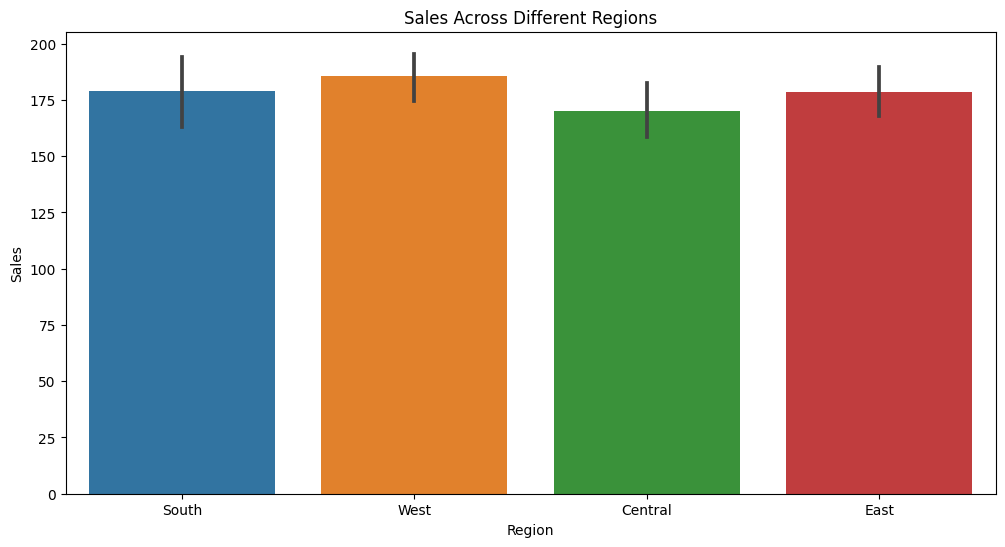

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Region' and 'Sales' columns are present in the dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=retail)
plt.title('Sales Across Different Regions')
plt.show()


In [28]:
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Category_Segment'],
      dtype='object')

# 7. Pricing and Discount Analysis:

### 1.Discount Analysis.

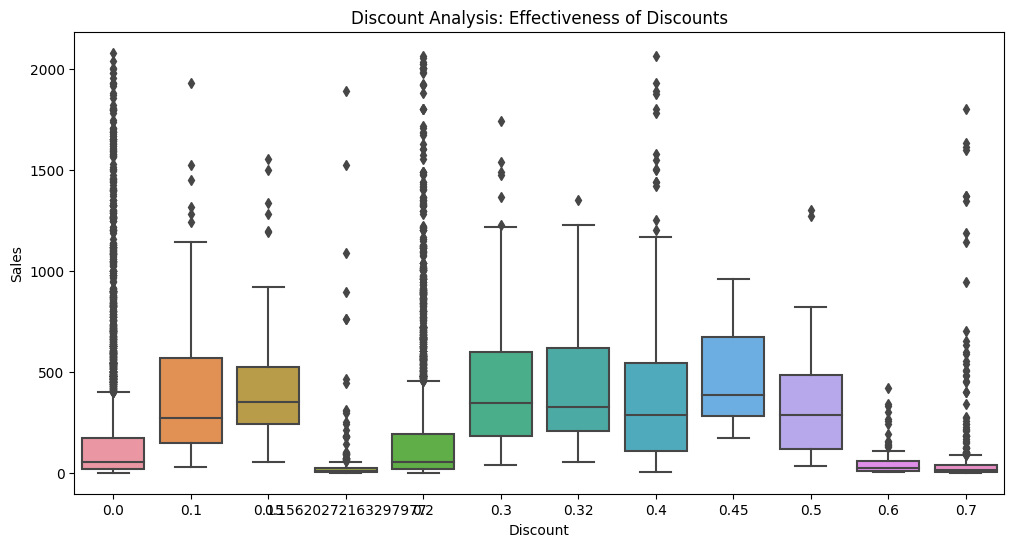

In [29]:
# Discount Analysis: Box plot to explore the effectiveness of discounts
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discount', y='Sales', data=retail)
plt.title('Discount Analysis: Effectiveness of Discounts')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


# 8. Inventory Analysis:

In [30]:
# Inventory Analysis: Calculating inventory turnover
inventory_data = retail.groupby('Sub-Category')[['Quantity', 'Sales']].sum().reset_index()
inventory_data['Inventory Turnover'] = inventory_data['Sales'] / inventory_data['Quantity']

# Identifying slow-moving or overstocked items
overstocked_items = inventory_data[inventory_data['Inventory Turnover'] < 1]
slow_moving_items = inventory_data[inventory_data['Inventory Turnover'] > 1]

# Displaying the results
print("Overstocked Items:")
print(overstocked_items[['Sub-Category', 'Inventory Turnover']])

print("\nSlow-Moving Items:")
print(slow_moving_items[['Sub-Category', 'Inventory Turnover']])


Overstocked Items:
Empty DataFrame
Columns: [Sub-Category, Inventory Turnover]
Index: []

Slow-Moving Items:
   Sub-Category  Inventory Turnover
0   Accessories           54.654161
1    Appliances           56.765383
2           Art            9.117495
3       Binders           22.038255
4     Bookcases          107.666315
5        Chairs          125.318157
6       Copiers          201.793624
7     Envelopes           18.185874
8     Fasteners            3.509514
9   Furnishings           26.493090
10       Labels            9.146421
11     Machines          114.023134
12        Paper           15.521829
13       Phones           91.665021
14      Storage           70.846311
15     Supplies           26.241623
16       Tables          147.266958


# 9. Market Basket Analysis:

In [31]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [32]:
import warnings

# Suppress DeprecationWarning from mlxtend
warnings.filterwarnings("ignore", category=DeprecationWarning)

from mlxtend.frequent_patterns import apriori, association_rules

# Using 'City' and 'Sub-Category' in the 'retail' DataFrame
df = retail[['City', 'Sub-Category']]

# One-hot encoding using get_dummies
basket = pd.get_dummies(df['Sub-Category']).groupby(df['City']).sum().clip(upper=1)   # < - The .clip(upper=1) is used to limit values to 1, essentially creating a binary matrix.

# Applying Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)              # < - The apriori function is applied to the one-hot encoded DataFrame to find frequent itemsets

# Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)          # < - The association_rules function is used to generate association rules from the frequent itemsets.

# Displaying the association rules
print("Association Rules:")
rules.head(10)


/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Appliances),(Accessories),0.338983,0.444444,0.193974,0.572222,1.287500,0.043315,1.298701,0.337814
1,(Accessories),(Appliances),0.444444,0.338983,0.193974,0.436441,1.287500,0.043315,1.172932,0.401942
2,(Accessories),(Art),0.444444,0.442561,0.252354,0.567797,1.282979,0.055660,1.289760,0.397015
3,(Art),(Accessories),0.442561,0.444444,0.252354,0.570213,1.282979,0.055660,1.292629,0.395674
4,(Binders),(Accessories),0.606403,0.444444,0.325800,0.537267,1.208851,0.056288,1.200597,0.438947
5,(Accessories),(Binders),0.444444,0.606403,0.325800,0.733051,1.208851,0.056288,1.474427,0.310983
6,(Bookcases),(Accessories),0.205273,0.444444,0.124294,0.605505,1.362385,0.033061,1.408269,0.334698
7,(Accessories),(Bookcases),0.444444,0.205273,0.124294,0.279661,1.362385,0.033061,1.103268,0.478788
8,(Chairs),(Accessories),0.367232,0.444444,0.222222,0.605128,1.361538,0.059008,1.406926,0.419643
9,(Accessories),(Chairs),0.444444,0.367232,0.222222,0.500000,1.361538,0.059008,1.265537,0.477966


- *a technique used to discover relationships between products in a transaction dataset.*


# 10. Sales Channel Analysis:

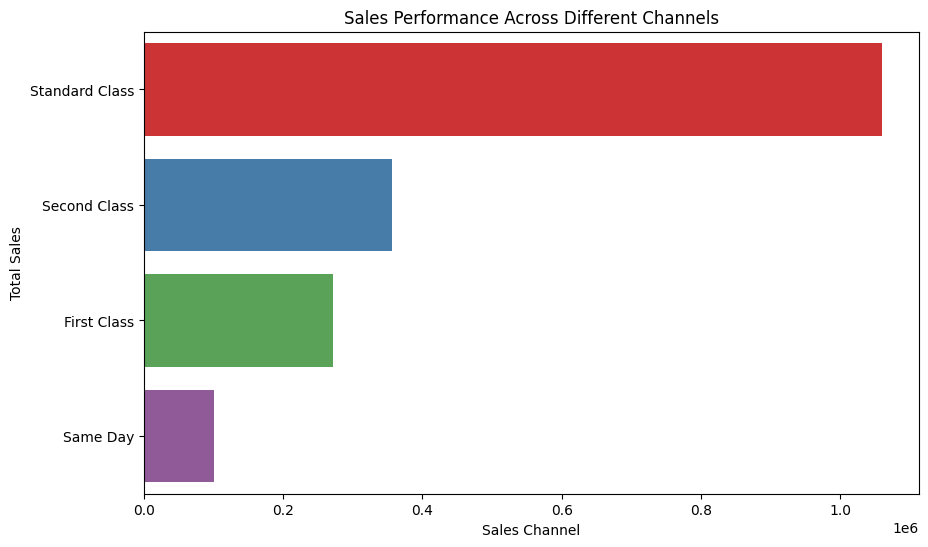

Sales Performance Across Different Channels:


Ship Mode
Standard Class   $1,059,382.90
Second Class       $356,958.04
First Class        $271,150.25
Same Day           $100,997.10
Name: Sales, dtype: float64

In [33]:
# Using 'Ship Mode' as the column representing sales channels in the 'retail' DataFrame
channel_data = retail[['Ship Mode', 'Sales']]

# Grouping by sales channels and calculating total sales
channel_sales = channel_data.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(y=channel_sales.index, x=channel_sales.values, palette="Set1")
plt.title('Sales Performance Across Different Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.show()

# Set the display format for floats
pd.options.display.float_format = '${:,.2f}'.format

# Displaying the sales performance data
print("Sales Performance Across Different Channels:")
channel_sales

# Business Problems Derived from EDA:

Based on the exploratory data analysis (EDA) conducted on the retail dataset, several business problems and challenges can be identified. These issues present opportunities for improvement and strategic interventions. Here are some key business problems derived from the EDA:

1. **Low Profit Margins on Certain Products:**
   - Some product categories, such as "Tables" and "Bookcases," exhibit lower profit margins. The business needs to assess whether it's viable to continue selling these products or if adjustments to pricing, sourcing, or marketing are necessary to enhance profitability.

2. **Inefficient Inventory Management:**
   - The analysis reveals variations in inventory turnover for different product categories. Overstocking or understocking issues may exist, leading to increased carrying costs or missed sales opportunities. Implementing more precise inventory management strategies can improve efficiency.

3. **Regional Disparities in Sales:**
   - There are significant differences in sales across regions, with the West region outperforming others. Addressing the reasons behind regional variations can help in tailoring marketing efforts, optimizing product selection, and improving customer engagement in underperforming regions.

4. **Ineffective Discount Strategies:**
   - The data suggests that higher discounts do not necessarily correlate with higher sales. This indicates a need for a more nuanced approach to discounting, considering the impact on both sales volume and profitability.

5. **Customer Segmentation Challenges:**
   - While customer segments like "Consumer," "Corporate," and "Home Office" are identified, further analysis may be needed to understand the specific needs and preferences of each segment. Tailoring marketing and sales strategies to effectively target and serve each segment can enhance customer engagement.

6. **Opportunities for Customer Retention:**
   - Identifying the top 10 valuable customers presents an opportunity to implement customer retention strategies. Building stronger relationships with these key clients through personalized services, loyalty programs, or targeted promotions can help retain and expand their business.

7. **Product Association Opportunities:**
   - Market basket analysis suggests potential opportunities to create bundled promotions or optimize product placements based on associations between product categories. Leveraging these insights can enhance the overall shopping experience and increase cross-selling opportunities.

8. **Regional Marketing Strategy:**
   - Recognizing the importance of regional variations in customer behavior and preferences, the business can benefit from developing targeted marketing strategies for each region to maximize sales and customer satisfaction.

9. **Addressing Seasonal Trends:**
   - The analysis highlights fluctuations in sales throughout the year. Developing strategies to address seasonal trends, such as adjusting inventory levels, launching targeted promotions, or introducing seasonal products, can help capitalize on peak periods.



# Recommendations:

To address the identified business problems derived from the exploratory data analysis (EDA) of the retail dataset, here are some recommendations:

1. **Profit Margin Improvement:**
   - Evaluate the pricing strategy for products with low profit margins. Consider whether adjustments can be made to increase prices without significantly impacting sales. Alternatively, explore opportunities to reduce costs in the supply chain or sourcing process.

2. **Inventory Management Optimization:**
   - Implement advanced inventory management techniques, such as demand forecasting and just-in-time inventory, to optimize stock levels. Use historical data to predict demand patterns more accurately and reduce the risk of overstocking or understocking.

3. **Regional Sales Disparities:**
   - Conduct market research to understand regional preferences, buying behavior, and competition. Tailor marketing campaigns and product assortments to better align with the needs of each region. Consider partnerships or collaborations with local businesses to strengthen your presence.

4. **Discount Strategy Refinement:**
   - Analyze the impact of discounts on both sales volume and profitability. Implement A/B testing to assess the effectiveness of different discount levels and structures. Focus on targeted promotions that resonate with specific customer segments to maximize the impact of discounts.

5. **Customer Segmentation Refinement:**
   - Dive deeper into customer segments to understand the unique needs and preferences of each group. Tailor marketing messages, promotions, and product recommendations to address the specific characteristics of different segments. Use data-driven insights to enhance customer engagement.

6. **Customer Retention Strategies:**
   - Develop and implement customer retention programs for the top 10 valuable customers. Offer personalized incentives, exclusive promotions, or loyalty programs to strengthen the relationship. Regularly communicate with these customers to gather feedback and address their specific needs.

7. **Product Association Strategies:**
   - Leverage market basket analysis to create bundled promotions or optimize product placements based on associations between products. Implement cross-selling and upselling strategies to increase the average transaction value. Enhance the overall shopping experience with well-designed product bundles.

8. **Regional Marketing Campaigns:**
   - Design region-specific marketing campaigns that resonate with local audiences. Consider cultural nuances, seasonal trends, and regional preferences in advertising and promotions. Establish partnerships with local influencers or organizations to enhance brand visibility in each region.

9. **Seasonal Trend Management:**
   - Develop a flexible business strategy that adapts to seasonal trends. Plan inventory levels and marketing campaigns in advance to capitalize on peak seasons. Introduce seasonal products or promotions that align with customer demand during specific times of the year.

10. **Continuous Monitoring and Adaptation:**
    - Implement a system for continuous monitoring of key performance indicators (KPIs) and market trends. Regularly update strategies based on new data and changing market conditions. Embrace a data-driven and agile approach to stay responsive to customer needs and competitive dynamics.

>- By implementing these recommendations, the business can address specific challenges identified during the EDA process and work toward improving overall operational efficiency, customer satisfaction, and profitability. 
>- Regularly reassessing strategies based on ongoing data analysis will help the business stay agile and competitive in the dynamic retail landscape.